# HDBSCAN

In [2]:
%reload_ext autoreload
%autoreload 2
import sys
sys.path.append("..")

from acse_9_irp_wafflescore import MiscHelpers as mh
from acse_9_irp_wafflescore import FCMHelpers as fh
from acse_9_irp_wafflescore import dataPreprocessing as dp
from acse_9_irp_wafflescore import HDBScanHelpers as hp

import numpy as np

import logging
import sys

logging.basicConfig(format='%(asctime)s | %(levelname)s : %(message)s',
                     level=logging.INFO, stream=sys.stdout)

# Tested with model with smaller anomaly (M5b)

In [ ]:
model = 'M5b'

pdir = '../data/' + model + '_xz_pos.npy'
xz_pos = np.load(pdir)
x = xz_pos[:, 0]
z = xz_pos[:, 1]

ldir = '../data/' + model + '_data_label.npy'
label = np.load(ldir)

cdir = '../data/' + model + '_clean_data.npy'
data = np.load(cdir)

ddir = '../data/' + model + '_init_data.npy'
idata = np.load(cdir)

means, stds = dp.compMeanStd(data)
norm_data = dp.normalize(data, means, stds)

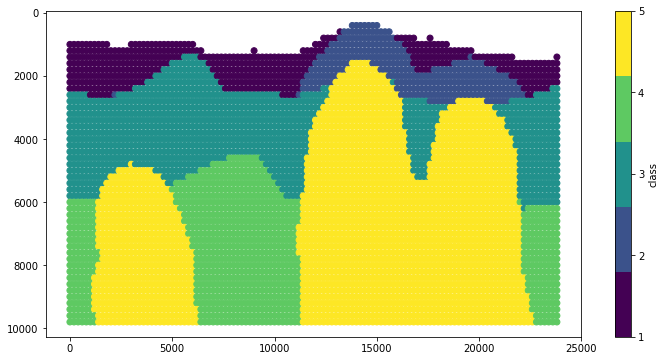

In [4]:
# Plotting the True label of the input
mh.plot_e_model(label, x, z, sep_label=True)

## Test including x and z position

In [33]:
cluster_labels, avg_sils, avg_ch, min_size, min_sam = hp.random_search_hdb(norm_data, (5,5), max_eval=40, rand_range=(50,50))

2019-08-28 22:08:41,844 | INFO : min_size=41, min_sam=7, sil=0.033892, ch=312.607535
2019-08-28 22:08:42,546 | INFO : min_size=32, min_sam=35, sil=-0.006569, ch=382.410634
2019-08-28 22:08:43,215 | INFO : min_size=41, min_sam=5, sil=-0.019930, ch=359.487505
2019-08-28 22:08:43,894 | INFO : min_size=18, min_sam=34, sil=-0.047009, ch=288.619069
2019-08-28 22:08:44,561 | INFO : min_size=36, min_sam=22, sil=-0.015698, ch=329.262821
2019-08-28 22:08:45,245 | INFO : min_size=46, min_sam=15, sil=0.026512, ch=359.889008
2019-08-28 22:08:45,940 | INFO : min_size=7, min_sam=38, sil=-0.047437, ch=338.765812
2019-08-28 22:08:46,615 | INFO : min_size=36, min_sam=25, sil=-0.031109, ch=344.944592
2019-08-28 22:08:47,281 | INFO : min_size=9, min_sam=20, sil=-0.053446, ch=263.857983
2019-08-28 22:08:47,997 | INFO : min_size=52, min_sam=28, sil=0.010888, ch=431.330757
2019-08-28 22:08:48,753 | INFO : min_size=7, min_sam=31, sil=-0.016589, ch=346.222935
2019-08-28 22:08:49,575 | INFO : min_size=13, min_s

min_size, min_sample: 26.0 12.0
silhouette score: 0.04214140817489476
calinski harabaz score: 358.79919423632015


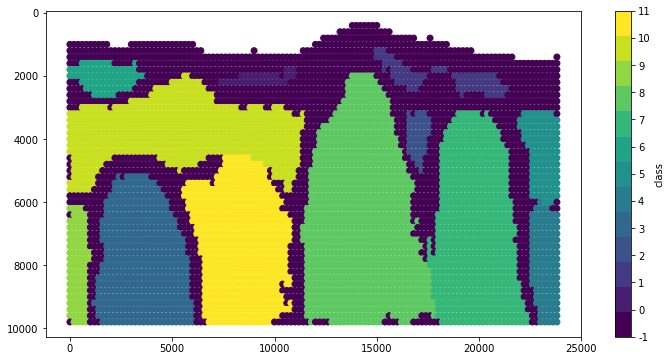

In [32]:
for i in range(cluster_labels.shape[0]):
    print("min_size, min_sample:", min_size[i], min_sam[i])
    print("silhouette score:", avg_sils[i])
    print("calinski harabaz score:", avg_ch[i])
    mh.plot_e_model(cluster_labels[i], x, z, sep_label=True)

min_size, min_sample: 41.0 7.0
silhouette score: 0.033891681261130305
calinski harabaz score: 312.60753498930006


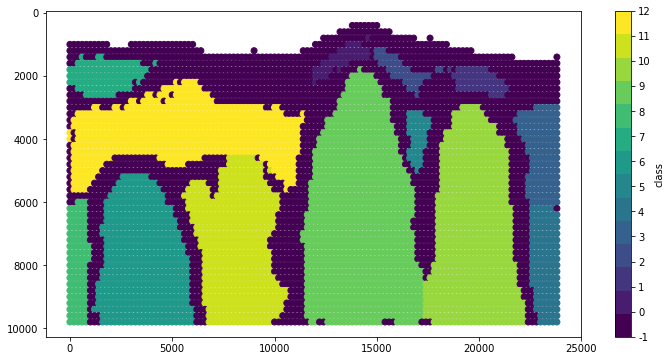

min_size, min_sample: 52.0 28.0
silhouette score: 0.010887587568023788
calinski harabaz score: 431.33075691461823


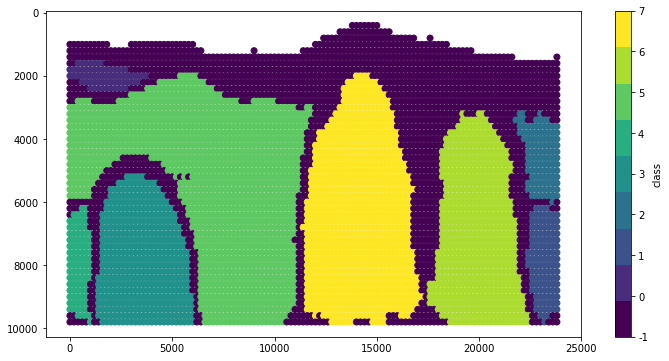

In [34]:
for i in range(cluster_labels.shape[0]):
    print("min_size, min_sample:", min_size[i], min_sam[i])
    print("silhouette score:", avg_sils[i])
    print("calinski harabaz score:", avg_ch[i])
    mh.plot_e_model(cluster_labels[i], x, z, sep_label=True)

## Test excluding x and z position

In [35]:
# without X, Z position
cluster_labels_2, avg_sils_2, avg_ch_2, min_size_2, min_sam_2 = hp.random_search_hdb(norm_data[:,:-2], (5,5), max_eval=40, rand_range=(50,50))

2019-08-28 22:10:11,519 | INFO : min_size=41, min_sam=7, sil=0.014174, ch=307.283049
2019-08-28 22:10:12,223 | INFO : min_size=32, min_sam=35, sil=0.087001, ch=822.174716
2019-08-28 22:10:12,923 | INFO : min_size=41, min_sam=5, sil=-0.039531, ch=291.822365
2019-08-28 22:10:13,705 | INFO : min_size=18, min_sam=34, sil=-0.051909, ch=219.336521
2019-08-28 22:10:14,438 | INFO : min_size=36, min_sam=22, sil=0.080047, ch=397.989598
2019-08-28 22:10:15,105 | INFO : min_size=46, min_sam=15, sil=0.018021, ch=311.204850
2019-08-28 22:10:15,818 | INFO : min_size=7, min_sam=38, sil=0.052823, ch=649.295445
2019-08-28 22:10:16,515 | INFO : min_size=36, min_sam=25, sil=0.091734, ch=418.400412
2019-08-28 22:10:17,178 | INFO : min_size=9, min_sam=20, sil=0.001870, ch=447.763092
2019-08-28 22:10:17,791 | INFO : min_size=52, min_sam=28, sil=0.082882, ch=378.318308
2019-08-28 22:10:18,484 | INFO : min_size=7, min_sam=31, sil=-0.047938, ch=200.560085
2019-08-28 22:10:19,202 | INFO : min_size=13, min_sam=43

min_size, min_sample: 32.0 35.0
silhouette score: 0.08700110793155331
calinski harabaz score: 822.1747163801657


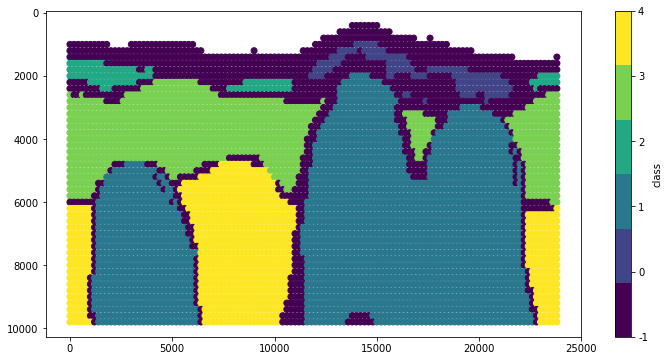

min_size, min_sample: 48.0 21.0
silhouette score: 0.11771919249490731
calinski harabaz score: 479.08900459726874


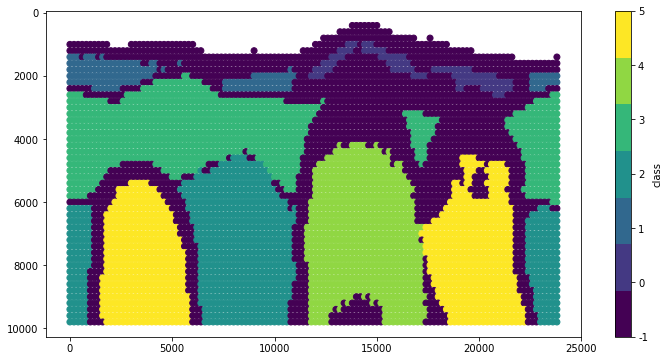

In [26]:
for i in range(cluster_labels_2.shape[0]):
    print("min_size, min_sample:", min_size_2[i], min_sam_2[i])
    print("silhouette score:", avg_sils_2[i])
    print("calinski harabaz score:", avg_ch_2[i])
    mh.plot_e_model(cluster_labels_2[i], x, z, sep_label=True)

min_size, min_sample: 33.0 44.0
silhouette score: 0.21447144495040937
calinski harabaz score: 857.4271250313056


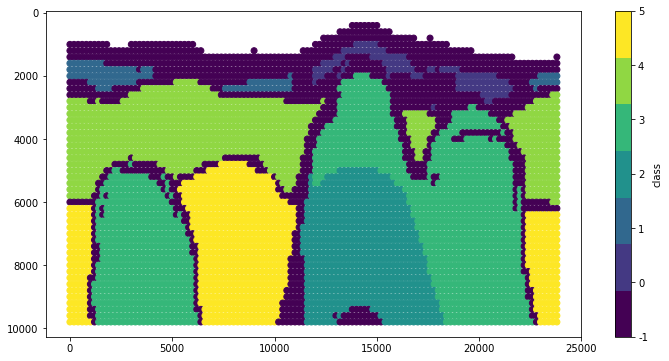

In [36]:
for i in range(cluster_labels_2.shape[0]):
    print("min_size, min_sample:", min_size_2[i], min_sam_2[i])
    print("silhouette score:", avg_sils_2[i])
    print("calinski harabaz score:", avg_ch_2[i])
    mh.plot_e_model(cluster_labels_2[i], x, z, sep_label=True)

# Tested with model with higher anomaly (M5a)


In [13]:
model = 'M5a'

pdir = '../data/' + model + '_xz_pos.npy'
xz_pos = np.load(pdir)
x = xz_pos[:, 0]
z = xz_pos[:, 1]

ldir = '../data/' + model + '_data_label.npy'
label = np.load(ldir)

cdir = '../data/' + model + '_clean_data.npy'
data = np.load(cdir)

ddir = '../data/' + model + '_init_data.npy'
idata = np.load(cdir)

means, stds = dp.compMeanStd(data)
norm_data = dp.normalize(data, means, stds)

## Test including x and z position

In [8]:
cluster_labels_3, avg_sils_3, avg_ch_3, min_size_3, min_sam_3 = hp.random_search_hdb(norm_data, (30,10), max_eval=40, rand_range=(10,50))

2019-08-30 00:10:02,923 | INFO : min_size=29, min_sam=7, sil=-0.019786, ch=283.017666
2019-08-30 00:10:03,666 | INFO : min_size=26, min_sam=35, sil=-0.029037, ch=314.452975
2019-08-30 00:10:04,380 | INFO : min_size=29, min_sam=5, sil=0.001953, ch=269.888584
2019-08-30 00:10:05,127 | INFO : min_size=23, min_sam=34, sil=0.034371, ch=314.513729
2019-08-30 00:10:05,834 | INFO : min_size=27, min_sam=22, sil=-0.034452, ch=286.114556
2019-08-30 00:10:06,528 | INFO : min_size=22, min_sam=7, sil=-0.019248, ch=264.024413
2019-08-30 00:10:07,272 | INFO : min_size=28, min_sam=36, sil=-0.035070, ch=307.927529
2019-08-30 00:10:07,966 | INFO : min_size=25, min_sam=9, sil=-0.024124, ch=265.267439
2019-08-30 00:10:08,844 | INFO : min_size=23, min_sam=52, sil=-0.024301, ch=302.146981
2019-08-30 00:10:09,532 | INFO : min_size=25, min_sam=7, sil=-0.015437, ch=281.773733
2019-08-30 00:10:10,262 | INFO : min_size=26, min_sam=13, sil=-0.080288, ch=250.290771
2019-08-30 00:10:11,040 | INFO : min_size=29, min_

min_size, min_sample: 29.0 27.0
silhouette score: 0.05918782497020997
calinski harabaz score: 374.47456903054984


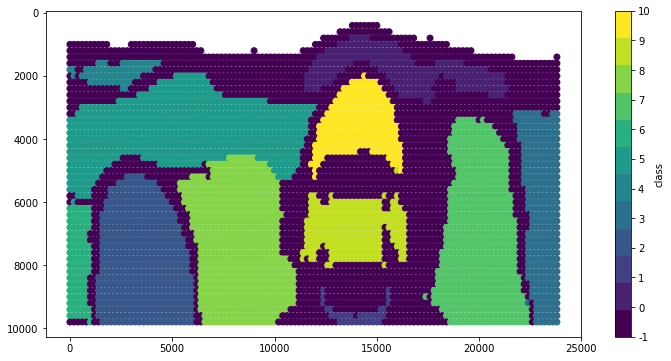

In [9]:
for i in range(cluster_labels_3.shape[0]):
    print("min_size, min_sample:", min_size_3[i], min_sam_3[i])
    print("silhouette score:", avg_sils_3[i])
    print("calinski harabaz score:", avg_ch_3[i])
    mh.plot_e_model(cluster_labels_3[i], x, z, sep_label=True)

min_size, min_sample: 48.0 24.0
silhouette score: 0.06584213067550503
calinski harabaz score: 396.9817597073947


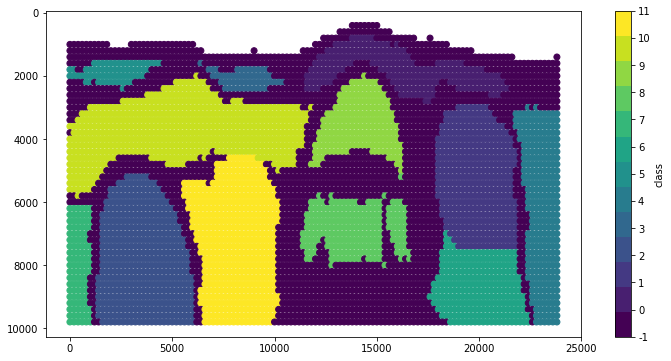

In [49]:
for i in range(cluster_labels_3.shape[0]):
    print("min_size, min_sample:", min_size_3[i], min_sam_3[i])
    print("silhouette score:", avg_sils_3[i])
    print("calinski harabaz score:", avg_ch_3[i])
    mh.plot_e_model(cluster_labels_3[i], x, z, sep_label=True)

## Test excluding x and z position

In [52]:
cluster_labels_4, avg_sils_4, avg_ch_4, min_size_4, min_sam_4 = hp.random_search_hdb(norm_data[:,:-2], (5,5), max_eval=20, rand_range=(10,50))

2019-08-28 22:21:25,724 | INFO : Random search using min_size = 14, min_sam = 7 result to very small / large number of clusters (n_clusters = 51)
2019-08-28 22:21:26,318 | INFO : min_size=11, min_sam=35, sil=0.157843, ch=621.297573
2019-08-28 22:21:26,369 | INFO : Random search using min_size = 14, min_sam = 5 result to very small / large number of clusters (n_clusters = 55)
2019-08-28 22:21:27,102 | INFO : min_size=8, min_sam=34, sil=0.176296, ch=735.826972
2019-08-28 22:21:27,732 | INFO : min_size=12, min_sam=22, sil=0.139484, ch=526.655751
2019-08-28 22:21:27,784 | INFO : Random search using min_size = 7, min_sam = 7 result to very small / large number of clusters (n_clusters = 107)
2019-08-28 22:21:28,643 | INFO : min_size=13, min_sam=36, sil=0.161099, ch=616.380631
2019-08-28 22:21:28,698 | INFO : Random search using min_size = 10, min_sam = 9 result to very small / large number of clusters (n_clusters = 37)
2019-08-28 22:21:29,542 | INFO : min_size=8, min_sam=52, sil=0.148017, ch

min_size, min_sample: 9.0 47.0
silhouette score: 0.18767730128029694
calinski harabaz score: 725.5765667667196


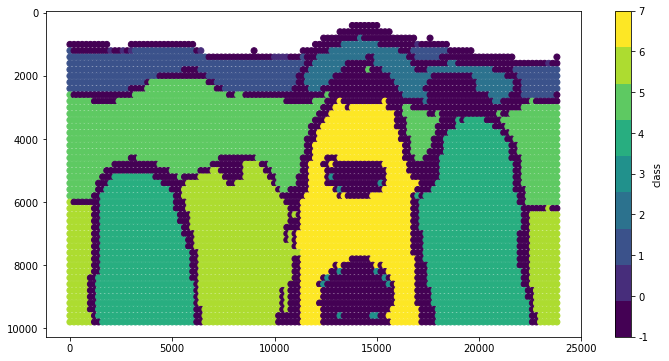

min_size, min_sample: 12.0 54.0
silhouette score: 0.18492479969911194
calinski harabaz score: 861.7878734336147


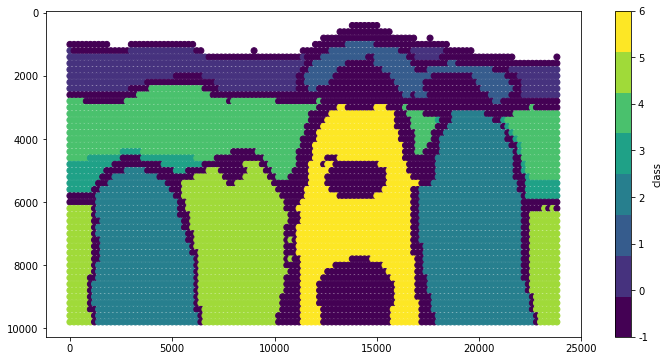

In [53]:
for i in range(cluster_labels_4.shape[0]):
    print("min_size, min_sample:", min_size_4[i], min_sam_4[i])
    print("silhouette score:", avg_sils_4[i])
    print("calinski harabaz score:", avg_ch_4[i])
    mh.plot_e_model(cluster_labels_4[i], x, z, sep_label=True)

min_size, min_sample: 27.0 29.0
silhouette score: 0.2201308274949193
calinski harabaz score: 908.3084309224492


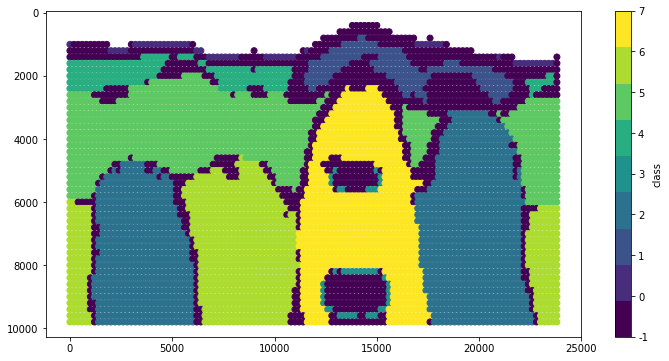

In [51]:
for i in range(cluster_labels_4.shape[0]):
    print("min_size, min_sample:", min_size_4[i], min_sam_4[i])
    print("silhouette score:", avg_sils_4[i])
    print("calinski harabaz score:", avg_ch_4[i])
    mh.plot_e_model(cluster_labels_4[i], x, z, sep_label=True)

### Test using K-NN to populate the noisy part of the result

Initial cluster.


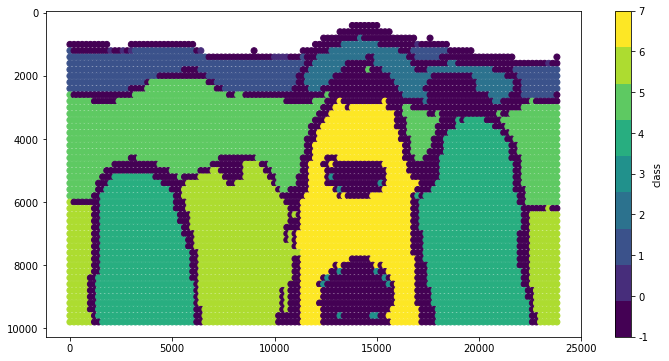

Cluster after applying KNN on noisy part.


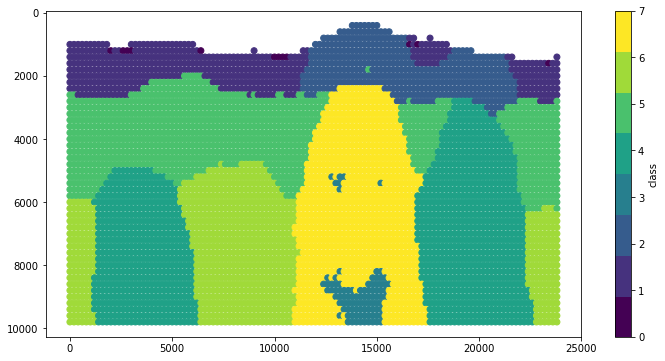

In [54]:
xz = np.vstack([x, z]).T

noise_idx = np.where(cluster_labels_4[0]==-1)
label_idx = np.where(cluster_labels_4[0]!=-1)

from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(xz[label_idx], cluster_labels_4[0][label_idx]) 

new_c = np.array(cluster_labels_4[0])

new_c[noise_idx] = neigh.predict(xz[noise_idx])

print("Initial cluster.")
mh.plot_e_model(cluster_labels_4[0], x, z, sep_label=True)
print("Cluster after applying KNN on noisy part.")
mh.plot_e_model(new_c, x, z, sep_label=True)

The result does not seem to be worth exploring. Letting the noisy part remains could help identify anomaly better. The user can then look at the noises and determine the lithology better.

In this case, the noisy part identifies temperature anomaly.

# Test with various input parameters

While the test was done in Physical Parameter Test notebook, the result from HDBSCAN are not meaningful since it returns a very high number of cluster. This is due to the hyperparameter used which are min_cluster_size=40 and min_samples=20. The two numbers were initially chosen from this notebook's parameter tuning result.

Tuning the parameter for each of the test cases may result to better clutering. This is tested on model M5a.

In [14]:
col_name = ['vp', 'vs', 'dn', 'vp/vs', 'qp', 'qs', 'x', 'z']

vp_idx = mh.search_list(col_name, 'vp')
vs_idx = mh.search_list(col_name, 'vs')
dn_idx = mh.search_list(col_name, 'dn')
vpvs_idx = mh.search_list(col_name, 'vp/vs')
qp_idx = mh.search_list(col_name, 'qp')

# when the only available data are: Vp, Vs, Vp/Vs
test_data_1 = np.squeeze(norm_data[:, [vp_idx, vs_idx, vpvs_idx]])

# when the only available data are: Vp, Qp, Density
test_data_2 = np.squeeze(norm_data[:, [vp_idx, qp_idx, dn_idx]])

# when the only available data are: Vp, Vs
test_data_3 = np.squeeze(norm_data[:, [vp_idx, vs_idx]])

### Vp, Vs, Vp/Vs

In [27]:
cluster_labels_t1, avg_sils_t1, avg_ch_t1, min_size_t1, min_sam_t1 = hp.random_search_hdb(test_data_1, (20, 20), max_eval=40, rand_range=(50, 50))

2019-08-30 00:44:50,092 | INFO : min_size=41, min_sam=7, sil=0.194908, ch=319.011753
2019-08-30 00:44:50,909 | INFO : min_size=32, min_sam=35, sil=0.070954, ch=271.018596
2019-08-30 00:44:51,722 | INFO : min_size=41, min_sam=5, sil=-0.006493, ch=223.239727
2019-08-30 00:44:52,549 | INFO : min_size=18, min_sam=34, sil=0.051098, ch=206.710658
2019-08-30 00:44:53,365 | INFO : min_size=36, min_sam=22, sil=0.083826, ch=273.829790
2019-08-30 00:44:54,150 | INFO : min_size=46, min_sam=15, sil=0.124773, ch=386.714298
2019-08-30 00:44:55,045 | INFO : min_size=7, min_sam=38, sil=-0.013351, ch=146.181027
2019-08-30 00:44:55,959 | INFO : min_size=36, min_sam=25, sil=0.096252, ch=331.502344
2019-08-30 00:44:56,016 | INFO : Random search using min_size = 9, min_sam = 20 result to very small / large number of clusters (n_clusters = 31)
2019-08-30 00:44:56,812 | INFO : min_size=52, min_sam=28, sil=0.101180, ch=327.482637
2019-08-30 00:44:57,634 | INFO : min_size=7, min_sam=31, sil=-0.034479, ch=145.14

min_size, min_sample: 41.0 7.0
silhouette score: 0.19490843932041305
calinski harabaz score: 319.01175327229606
entropy: 0.5057193148349315
purity: 0.8224807656220678


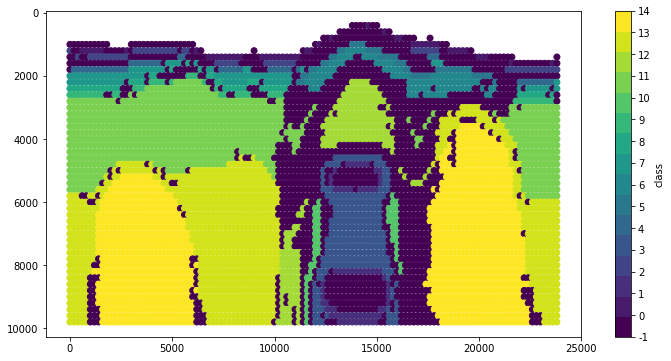

min_size, min_sample: 54.0 20.0
silhouette score: 0.1746320508952518
calinski harabaz score: 478.98456653733984
entropy: 0.5689168393131213
purity: 0.7860761869018578


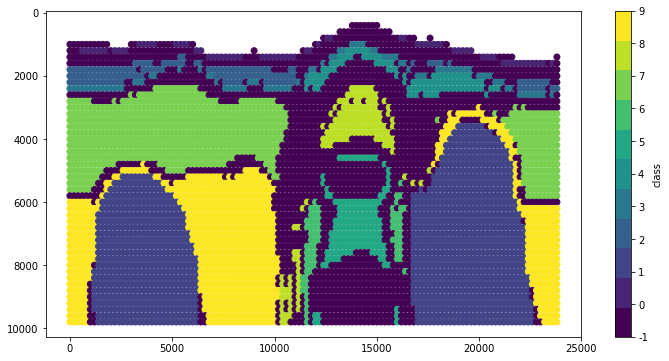

In [35]:
for i in range(cluster_labels_t1.shape[0]):
    print("min_size, min_sample:", min_size_t1[i], min_sam_t1[i])
    print("silhouette score:", avg_sils_t1[i])
    print("calinski harabaz score:", avg_ch_t1[i])
    ent, pur = mh.ext_eval_entropy(label, cluster_labels_t1[i])
    print("entropy:", ent)
    print("purity:", pur)
    mh.plot_e_model(cluster_labels_t1[i], x, z, sep_label=True)

### Vp, Qp, Density

In [29]:
cluster_labels_t2, avg_sils_t2, avg_ch_t2, min_size_t2, min_sam_t2 = hp.random_search_hdb(test_data_2, (20, 20), max_eval=40, rand_range=(50, 50))

2019-08-30 00:45:24,352 | INFO : min_size=41, min_sam=7, sil=0.125865, ch=770.411416
2019-08-30 00:45:25,141 | INFO : min_size=32, min_sam=35, sil=0.076004, ch=594.184698
2019-08-30 00:45:25,932 | INFO : min_size=41, min_sam=5, sil=0.085488, ch=751.304360
2019-08-30 00:45:26,800 | INFO : min_size=18, min_sam=34, sil=0.066671, ch=369.503674
2019-08-30 00:45:27,623 | INFO : min_size=36, min_sam=22, sil=0.129777, ch=653.273187
2019-08-30 00:45:28,428 | INFO : min_size=46, min_sam=15, sil=0.120840, ch=796.212812
2019-08-30 00:45:29,303 | INFO : min_size=7, min_sam=38, sil=0.105524, ch=594.611728
2019-08-30 00:45:30,146 | INFO : min_size=36, min_sam=25, sil=0.119515, ch=647.397573
2019-08-30 00:45:30,966 | INFO : min_size=9, min_sam=20, sil=-0.027894, ch=329.441347
2019-08-30 00:45:31,660 | INFO : min_size=52, min_sam=28, sil=0.196292, ch=1033.462516
2019-08-30 00:45:32,402 | INFO : min_size=7, min_sam=31, sil=0.116441, ch=569.040360
2019-08-30 00:45:33,127 | INFO : min_size=13, min_sam=43,

min_size, min_sample: 13.0 43.0
silhouette score: 0.20871366151941825
calinski harabaz score: 1256.2051414589484
entropy: 0.377563304254495
purity: 0.8262338149746671


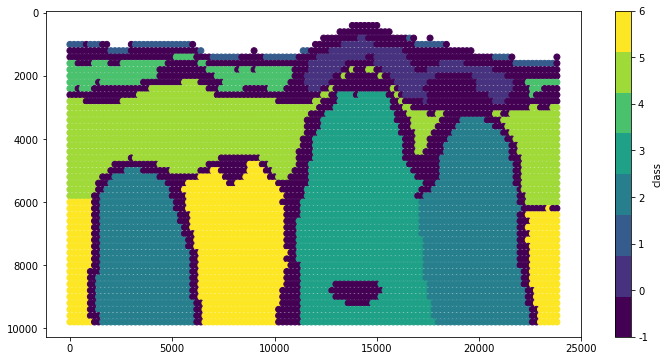

min_size, min_sample: 7.0 36.0
silhouette score: 0.2015981867933549
calinski harabaz score: 1267.044115450679
entropy: 0.3427577773637517
purity: 0.8607618690185777


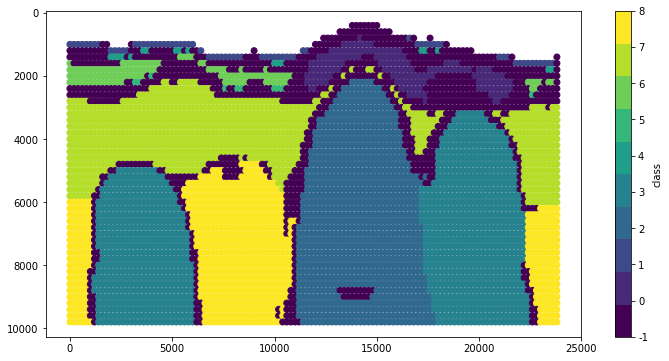

In [34]:
for i in range(cluster_labels_t2.shape[0]):
    print("min_size, min_sample:", min_size_t2[i], min_sam_t2[i])
    print("silhouette score:", avg_sils_t2[i])
    print("calinski harabaz score:", avg_ch_t2[i])
    ent, pur = mh.ext_eval_entropy(label, cluster_labels_t2[i])
    print("entropy:", ent)
    print("purity:", pur)
    mh.plot_e_model(cluster_labels_t2[i], x, z, sep_label=True)

 ### Vp, Vs

In [31]:
cluster_labels_t3, avg_sils_t3, avg_ch_t3, min_size_t3, min_sam_t3 = hp.random_search_hdb(test_data_3, (20, 20), max_eval=40, rand_range=(50, 50))

2019-08-30 00:47:22,400 | INFO : min_size=41, min_sam=7, sil=0.043287, ch=574.203668
2019-08-30 00:47:23,270 | INFO : min_size=32, min_sam=35, sil=0.123573, ch=546.049216
2019-08-30 00:47:24,273 | INFO : min_size=41, min_sam=5, sil=0.037887, ch=561.300409
2019-08-30 00:47:25,155 | INFO : min_size=18, min_sam=34, sil=0.108302, ch=537.610283
2019-08-30 00:47:25,982 | INFO : min_size=36, min_sam=22, sil=0.114189, ch=587.498355
2019-08-30 00:47:26,794 | INFO : min_size=46, min_sam=15, sil=0.171447, ch=783.050321
2019-08-30 00:47:27,725 | INFO : min_size=7, min_sam=38, sil=0.074688, ch=375.218451
2019-08-30 00:47:28,773 | INFO : min_size=36, min_sam=25, sil=0.129483, ch=609.084326
2019-08-30 00:47:29,694 | INFO : min_size=9, min_sam=20, sil=-0.021176, ch=302.595533
2019-08-30 00:47:30,611 | INFO : min_size=52, min_sam=28, sil=0.097790, ch=571.578059
2019-08-30 00:47:31,495 | INFO : min_size=7, min_sam=31, sil=0.071989, ch=337.930443
2019-08-30 00:47:32,393 | INFO : min_size=13, min_sam=43, 

min_size, min_sample: 37.0 15.0
silhouette score: 0.17733598480682622
calinski harabaz score: 829.779327735832
entropy: 0.5349634047535703
purity: 0.8082191780821917


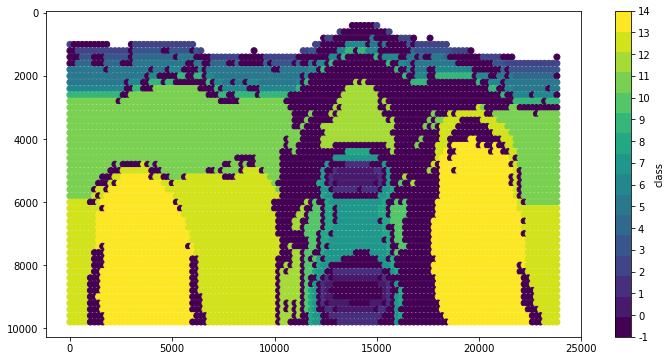

min_size, min_sample: 43.0 14.0
silhouette score: 0.1649606787549347
calinski harabaz score: 854.9960656136499
entropy: 0.553090026470361
purity: 0.8029649089885533


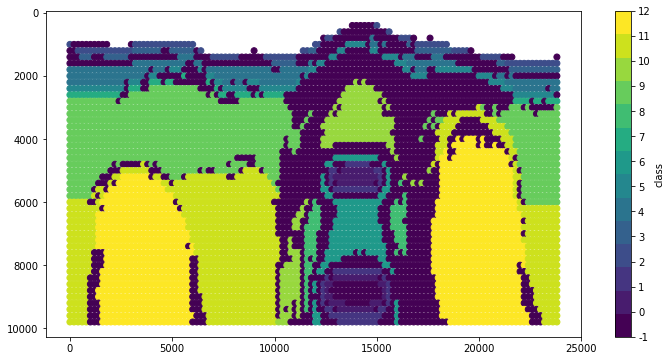

In [33]:
for i in range(cluster_labels_t3.shape[0]):
    print("min_size, min_sample:", min_size_t3[i], min_sam_t3[i])
    print("silhouette score:", avg_sils_t3[i])
    print("calinski harabaz score:", avg_ch_t3[i])
    ent, pur = mh.ext_eval_entropy(label, cluster_labels_t3[i])
    print("entropy:", ent)
    print("purity:", pur)
    mh.plot_e_model(cluster_labels_t3[i], x, z, sep_label=True)